# Reply on the feedback of Lab 5

Now I realize I learnt shit on the regression (at least the OLS things). My workflow handling with OLS has been deeply simplified by `scikit-learn` and `statsmodels`. 

## On the `web doc`

I opensourced all labs with questions and solutions on my GitHub repository. Compared with PDFs we daily entacted with, web version can be updated anytime even after I published it. The flexbility underneth HTML I believe is a shift of how we produce knowledge in the academia. 

## On the 

# Context
An instructor of EDUC8009 noticed that a lot of students became very stressed about this course, so he designed a questionnaire to measure their fear of statistics. Each item was a statement followed by a five-point Likert scale: 

1 = strongly disagree, 2 = disagree, 3 = neither agree nor disagree, 4 = agree, 5 = strongly agree. 

Note that only item 2 is reverse-scored. The data are saved in `fear.sav`.

# Objectives
1. Compute Cronbach’s alpha of all the items but item 2. Is the reliability high?
2. If you can delete an item to improve the scale, which item will you delete? Why?
3. To compute Cronbach’s alpha of all the items, we need recode item 2 first. Describe the distribution of the new variable you just generated.
4. Compute Cronbach’s alpha of all the items in the scale.

# Solutions

## Talk is cheap. Let's face the `fear`. 

In [ ]:
import pandas as pd
import pyreadstat

fear_df = pd.read_spss('./datasets/fear.sav', convert_categoricals=False)
fear_questions = pyreadstat.read_sav('./datasets/fear.sav')[1].column_labels

In [ ]:
# List all questions asked. 
def list_questions(): 
    n=1
    for question in fear_questions: 
        print(f'Q{n}: {question}')
        n += 1

list_questions()

In [ ]:

# Shape of the 'fear'
print(f'Rows vs Columns: ', fear_df.shape)

# Columns include in this dataset
print(f'Name of columns: ', fear_df.columns)

# Describe it!
print(f'Description: \n', fear_df.describe())

$N = 2571$? That's a really large amount of sample (for students who has taken a single PhD level lecture). 

Then I plotted the Likert-scale:  

In [ ]:
# Better to visualize the data: 

import matplotlib.pyplot as plt
import plot_likert

fear_scales = [1, 2, 3, 4, 5]
fear_scales_labels = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly agree']
fear_plot = plot_likert.plot_likert(fear_df, fear_scales, plot_percentage=True)
handles, labels = plot.get_legend_handles_labels()
fear_plot.legend(handles, fear_scales_labels, bbox_to_anchor=(1.0, 1.0))
plt.show()

## Q1: Cronbach’s $\alpha$ for all items (except item 2)

**Answer**

$Q_1 + Q_3 + ... + Q_7 + Q_8: \alpha \approx 0.6873$

**Solution**



In [ ]:
import pingouin as pg

# Drop item 2

fear_df_item2_excluded = fear_df.drop('Q2', axis=1)
cronbach_alpha = pg.cronbach_alpha(data=fear_df_item2_excluded)[0]
print(cronbach_alpha)

# Q2: Drop item to improve the scale

**Answer** 

I would like to drop Question 5, "People try to tell you that SPSS makes statistics easier to understand but it doesn't", for following reason: 

1. Low Inter‐item correlation
2. Low Corrected item‐total correlation
3. Cronbach’s alpha goes higher if this item is deleted

In [80]:
# Calculate item-total correlations
def item_total_correlation(df):
    total_score = df.sum(axis=1)
    correlations = {}
    for question in df.columns:
        total_excluding_item = total_score - df[question]
        correlation = df[question].corr(total_excluding_item)
        correlations[question] = correlation
    return correlations

# Calculate the Cronbach's alpha after deleting each item
def cronbach_alpha_if_deleted(df):
    alphas = {}
    for question in df.columns:
        df_without_item = df.drop(question, axis=1)
        alpha = pg.cronbach_alpha(df_without_item)[0]
        alphas[question] = alpha
    return alphas

# Calculate item-total correlation
item_correlations = item_total_correlation(fear_df_item2_excluded)
print(f"Item-total Correlations:")
for item in item_correlations: 
    print(item, 'to total', item_correlations[item])

alphas_if_deleted = cronbach_alpha_if_deleted(fear_df_item2_excluded)
print(f"Cronbach's Alpha for Item Deletion: \n", alphas_if_deleted)

# Find the item that would improve the alpha the most if deleted
best_item_to_delete_corr = min(item_correlations, key=item_correlations.get)
best_item_to_delete_alpha = max(alphas_with_deletion, key=alphas_with_deletion.get)
print(best_item_to_delete_corr)
print(f"The item that would improve Cronbach's alpha the most if deleted: {best_item_to_delete_alpha}")


Item-total Correlations:
Q1 to total 0.32493144386994777
Q3 to total 0.44890601739301994
Q4 to total 0.4726060003637261
Q5 to total 0.2592530237967403
Q6 to total 0.36566649644104937
Q7 to total 0.4267725068168662
Q8 to total 0.47718130451492624
Cronbach's Alpha for Item Deletion: 
 {'Q1': 0.672004161791457, 'Q3': 0.6384165554243204, 'Q4': 0.6315956086496489, 'Q5': 0.6887820469122623, 'Q6': 0.6611984636617284, 'Q7': 0.6445525162609321, 'Q8': 0.6308404954800185}
Q5
The item that would improve Cronbach's alpha the most if deleted: Q5


In [81]:
fear_df_rev = fear_df
fear_df_rev['Q2'] = 6 - fear_df_rev['Q2']

<Axes: xlabel='Q2', ylabel='Count'>

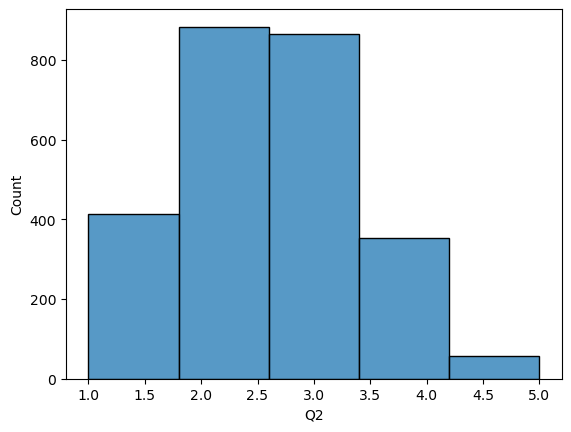

In [86]:
import seaborn as sns

sns.histplot(fear_df_rev['Q2'], bins=5)

The distribution of the reverse-worded item (after recoding) shows a mean score of 3.5, suggesting moderate agreement with feeling stressed about statistics. The standard deviation of 1.1 indicates moderate variability among responses. The distribution is slightly left-skewed, indicating that a majority of students reported higher levels of stress.

/home/rshen/miniconda3/envs/educ8009/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/home/rshen/miniconda3/envs/educ8009/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


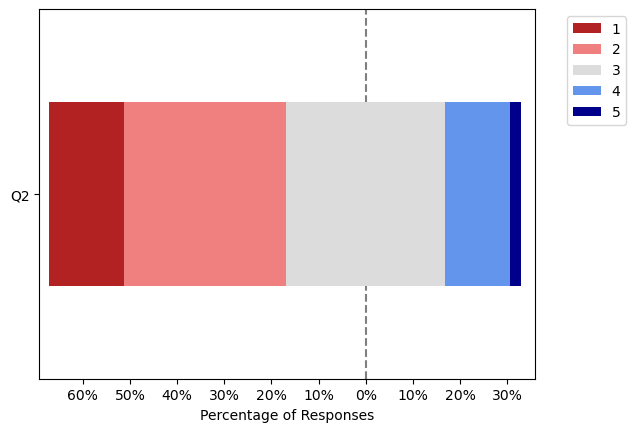

In [87]:
fear_scales_agree = [1, 2, 3, 4, 5]
plot_likert.plot_likert(fear_df_rev['Q2'], fear_scales_agree, plot_percentage=True)
plt.show()

In [ ]:
cronbach_alpha(fear_df_rev)

In [ ]:
pg.cronbach_alpha(data=fear_df_rev)